In [12]:
import pandas as pd
# csv 파일을 로딩
df = pd.read_csv("../../data/ozone/ozone2.csv")
df.head()

,Ozone,Result,Solar.R,Wind,Temp,Month,Day
0,41.00000,0,190.000000,7.4,67,5,1
1,36.00000,0,118.000000,8.0,72,5,2
2,12.00000,0,149.000000,12.6,74,5,3
3,18.00000,0,313.000000,11.5,62,5,4
4,42.12931,1,185.931507,14.3,56,5,5


c:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: 부족, 1: 정상)')

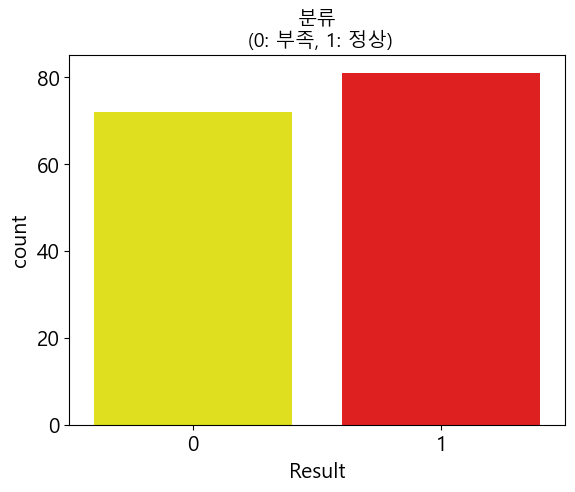

In [13]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
# 한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(\
fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import seaborn as sns
colors = ["yellow", "red"]
sns.countplot('Result', data=df, palette=colors)
plt.title('분류\n (0: 부족, 1: 정상)', fontsize=14)
# 불균형 데이터셋

In [14]:
train_cols = df.columns[2:5]
X = df[train_cols]
y = df['Result']

In [15]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['Result'])
df_samp=pd.concat([X_samp,y_samp],axis=1)
df_samp["Result"].value_counts()

0    72
1    72
Name: Result, dtype: int64

c:\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
c:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


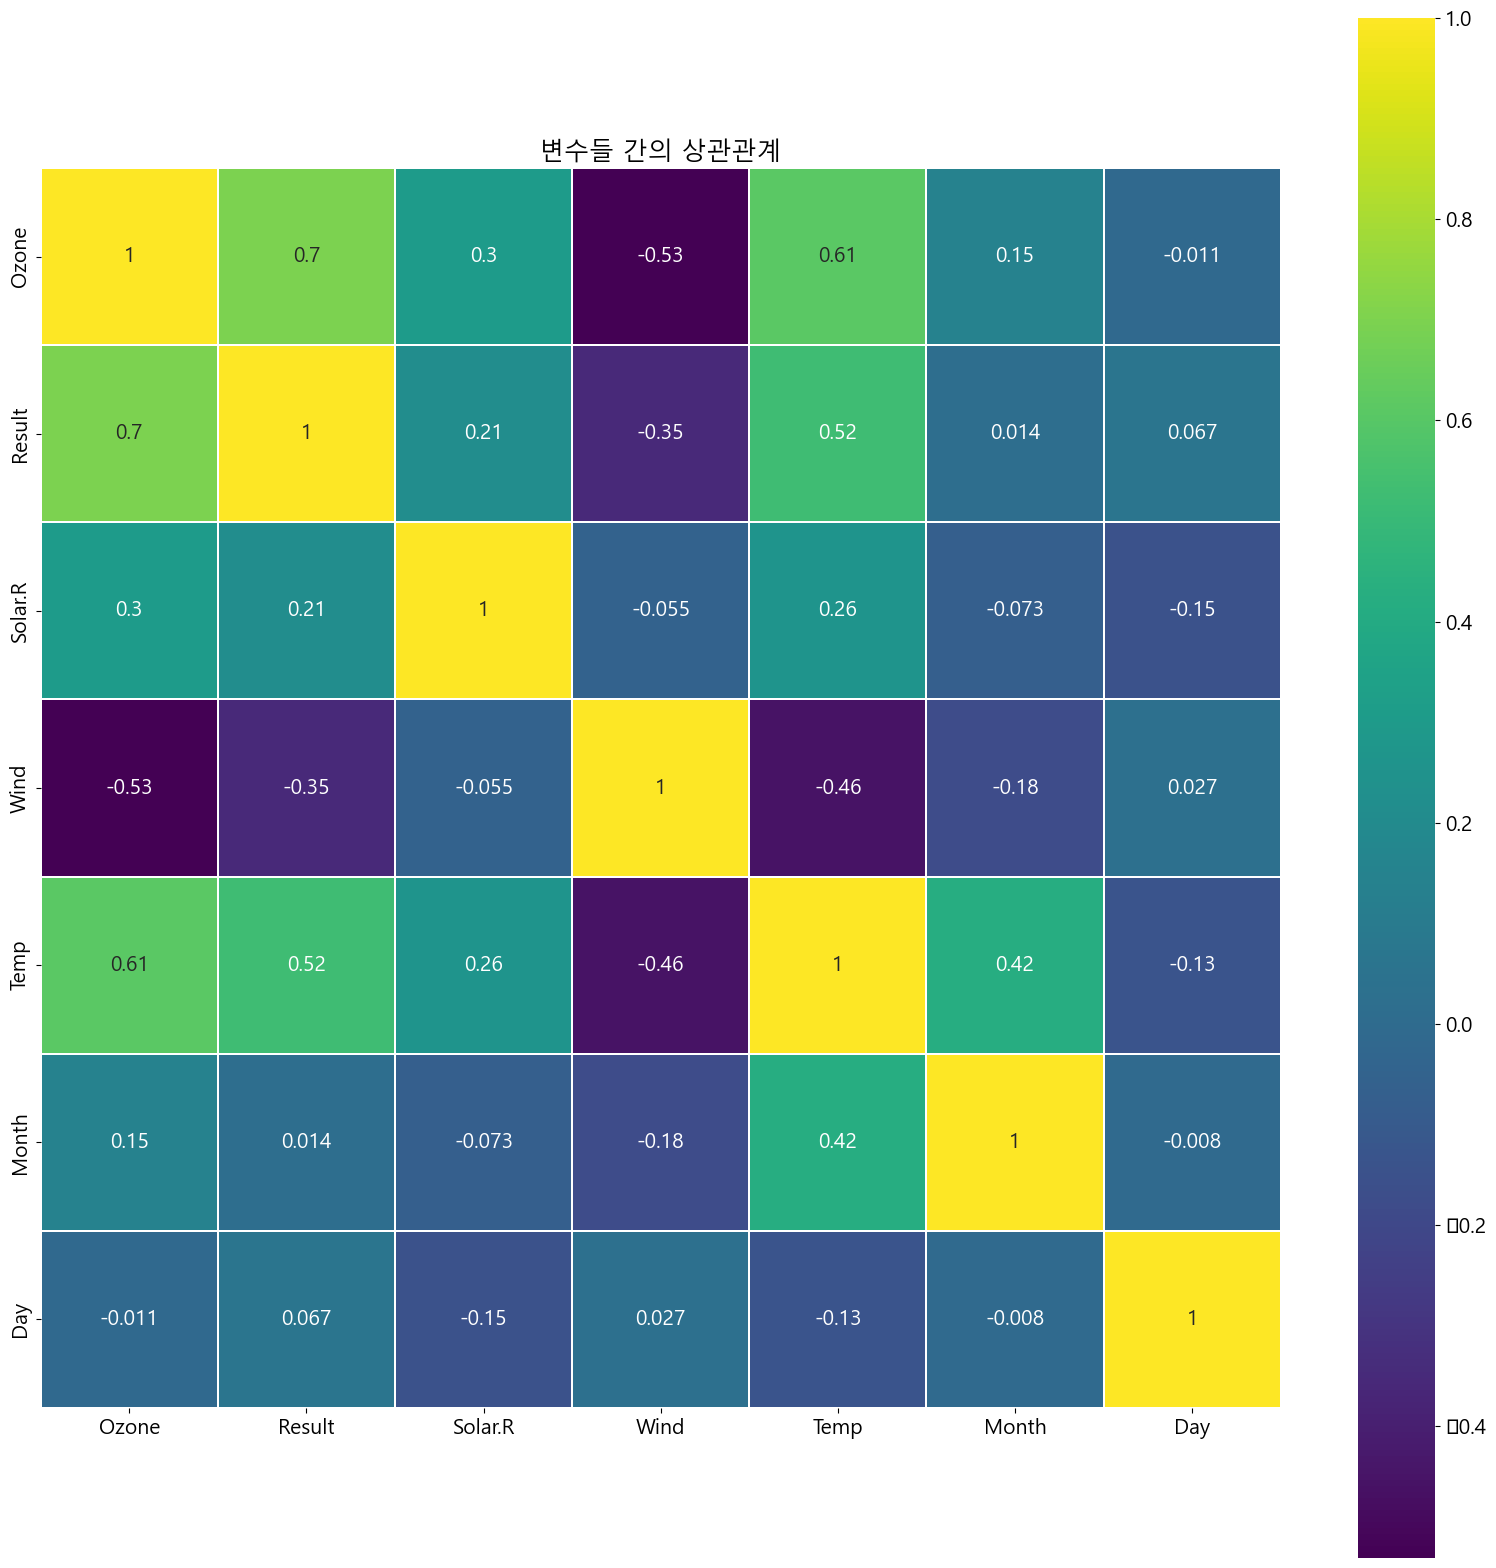

In [16]:
X = X_samp[train_cols]
y = y_samp['Result']
df_samp["Result"].value_counts()
#상관계수 행렬 그래프
plt.figure(figsize=(20, 20))
plt.rc('font', size=15)
sns.heatmap(df.corr(), linewidths=0.01, square=True,
annot=True, cmap=plt.cm.viridis,
linecolor="white")
plt.title('변수들 간의 상관관계')
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
#데이터셋 구분
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.2, random_state=7)

In [18]:
from keras.models import Sequential
from keras.layers import Dense
# 3. 모델 구성
model = Sequential(name='OzoneData')
# 노드개수, 독립변수 개수, 활성화함수 relu
model.add(Dense(128, input_shape=(len(X_train.columns),), activation='relu', name='hidden-1'))
model.add(Dense(64, activation='relu', name='hidden-2'))
model.add(Dense(64, activation='relu', name='hidden-3'))
# sigmoid : 0.0~1.0
model.add(Dense(1, activation='sigmoid', name='output'))
# 4. 모델 학습과정 설정
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [19]:
model.summary()

Model: "OzoneData"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden-1 (Dense)            (None, 128)               512       
                                                                 
 hidden-2 (Dense)            (None, 64)                8256      
                                                                 
 hidden-3 (Dense)            (None, 64)                4160      
                                                                 
 output (Dense)              (None, 1)                 65        
                                                                 
Total params: 12,993
Trainable params: 12,993
Non-trainable params: 0
_________________________________________________________________


In [20]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() #평균 0, 표준편차 1로 만드는 스케일러
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [21]:
from datetime import datetime
import tensorflow as tf
logdir = "d:/workspace/Python2/logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")
logdir

'd:/workspace/Python2/logs/20230414-175629'

In [22]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(X_train_scaled, y_train, epochs=500, callbacks=[tensorboard_callback])


Epoch 1/500
4/4 [==============================] - 1s 10ms/step - loss: 0.2416 - accuracy: 0.5391
Epoch 2/500
4/4 [==============================] - 0s 9ms/step - loss: 0.2207 - accuracy: 0.7652
Epoch 3/500
4/4 [==============================] - 0s 8ms/step - loss: 0.2049 - accuracy: 0.7565
Epoch 4/500
4/4 [==============================] - 0s 8ms/step - loss: 0.1915 - accuracy: 0.7652
Epoch 5/500
4/4 [==============================] - 0s 9ms/step - loss: 0.1791 - accuracy: 0.7652
Epoch 6/500
4/4 [==============================] - 0s 10ms/step - loss: 0.1697 - accuracy: 0.7565
Epoch 7/500
4/4 [==============================] - 0s 7ms/step - loss: 0.1623 - accuracy: 0.7652
Epoch 8/500
4/4 [==============================] - 0s 7ms/step - loss: 0.1581 - accuracy: 0.7739
Epoch 9/500
4/4 [==============================] - 0s 7ms/step - loss: 0.1543 - accuracy: 0.7739
Epoch 10/500
4/4 [==============================] - 0s 7ms/step - loss: 0.1528 - accuracy: 0.7739
Epoch 11/500
4/4 [=========

In [23]:
# # 5. 모델 학습
# hist = model.fit(X_train_scaled, y_train, epochs=1000)

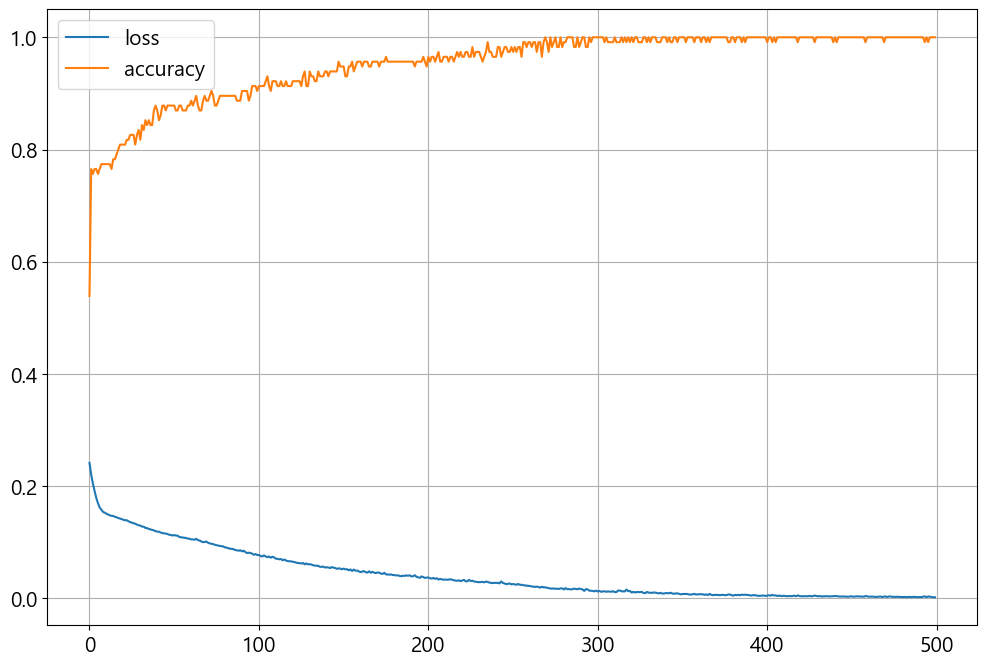

In [24]:
# 6. 모델 학습 과정 표시
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss']) #학습용 데이터셋의 손실률
plt.plot(hist.history['accuracy']) #학습용 데이터셋의 정확도
plt.legend(['loss','accuracy'])
plt.grid()
plt.show()

In [25]:
# 7. 모델 평가
scores = model.evaluate(X_train_scaled, y_train)
print(scores)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))
#학습용
scores = model.evaluate(X_test_scaled, y_test)
print(scores)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))
#검증용

4/4 [==============================] - 0s 4ms/step - loss: 0.0023 - accuracy: 1.0000
[0.0022564237006008625, 1.0]
accuracy: 100.00%
1/1 [==============================] - 0s 30ms/step - loss: 0.2534 - accuracy: 0.6897
[0.2533958852291107, 0.6896551847457886]
accuracy: 68.97%


In [26]:
# 새로운 값 예측
# 일조량 25, 풍량 10.8, 화씨온도 71도일 때의 오존량
test_set = [[25, 10.8, 71]]
test_set = scaler.transform(test_set)
print(model.predict(test_set))

1/1 [==============================] - 0s 130ms/step
[[0.6888998]]


c:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [27]:
# 일조량 25, 풍량 4.3, 화씨온도 90도일 때의 오존량
test_set = [[25, 4.3, 90]]
test_set=scaler.transform(test_set)
print(model.predict(test_set)) # 1일 확률 98.5%

1/1 [==============================] - 0s 28ms/step
[[0.18315305]]


c:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [28]:
model.save('../../models/ozone.h5')

In [29]:
import joblib
joblib.dump(scaler,'../../models/ozone_scaler.model')

['../../models/ozone_scaler.model']